## Praktikum-1 
### TF-2203 Sains Data Rekayasa
### Pembersihan Basis Data
### **1. Impor Pustaka dan Baca data:**   
- Impor pustaka yang diperlukan
- Muat kumpulan data
- View data menggunakan metode head()
- Cek ukuran data menggunakan metode shape()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Muat data dari file titanic.csv
df = pd.read_csv('titanic.csv')
# view 5 data pertama
df.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [2]:
# lihat ukuran data
print(df.shape)

(891, 12)


---
### **2. Inspeksi dan Eksplorasi Data**   
Periksa kumpulan data secara menyeluruh untuk memahami strukturnya, mengidentifikasi pola, potensi masalah, dan memperoleh wawasan sebelum membangun model prediktif.
- Periksa struktur dan identifikasi nilai yang hilang, outlier, dan inkonsistensi.
- Periksa baris duplikat.
- Periksa informasi data. 
- Periksa tipe data pada setiap kolom, kategoris dan Numerik.
- Periksa jumlah total Nilai Unik di Kolom Kategoris.

In [3]:
print('Baris-Baris Duplikat')
print(df[df.duplicated()])

Baris-Baris Duplikat
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


---

**Periksa informasi data** 
- gunakan metod info()
- perhatikan jumlah data untuk setiap kolom, 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---
**Cek Tipe Data Setiap Kolom**
- Kategoris : tipe data objek
- Numerik : tipe data selain objek

In [5]:
# Kolom Kategori
kol_kategori = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
print('Kolom Kategori :',kol_kategori)

# Kolom Numerik
kol_numerik = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
print('Kolom Numerik :',kol_numerik)

Kolom Kategori : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Kolom Numerik : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


---
**Periksa jumlah total Nilai Unik yang ada di Kolom Kategoris**
- Gunakan metod nunique() pada kolom tersebut

In [6]:
df[kol_kategori].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [7]:
df[kol_numerik].nunique()

PassengerId    891
Survived         2
Pclass           3
Age             88
SibSp            7
Parch            7
Fare           248
dtype: int64

### **3. Penghapusan Semua Data yang Tidak Diinginkan**
Untuk membersihkan data, hilangkan data yang duplikat dan tidak relevan. Duplikat, sering kali berasal dari kesalahan pengumpulan, membuang-buang sumber daya dan mendistorsi hasil. Data yang tidak relevan, tidak berguna untuk analisis, harus dihapus.

Tentukan faktor-faktor penting untuk analisis. Data teks harus diubah atau dihilangkan; pengidentifikasi unik seperti nama sering dihapus karena tidak memengaruhi variabel target. Untuk fitur kategoris seperti tiket, periksa nilai unik untuk menilai relevansinya.
Data duplikat paling sering muncul selama pengumpulan data dan data yang tidak relevan adalah data yang sebenarnya tidak sesuai dengan masalah spesifik yang ingin kita pecahkan. 

**Penghapusan data meliputi:**
- Penghapusan kolom yang tidak relevan
- Penghpusan data kosong
- Imputasi data kosong
- Penghapusan data outlier
  
Periksa keunikan data tickets.   
**Cetak nama tiket yang unik sebanyak 50 buah**
- gunakan metod unique() dengan batasan sebanyak 50 data

In [8]:
# Data 50 tiket unik
print(df['Ticket'].unique()[:50])

['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295']


Nama dan Tiket bisa dianggap unik, kita hilangkan kolom “Nama” dan “Tiket”.   
- gunakan metod drop disertai nama kolom untuk menhapus kolom
- simpan data yang sdh dihapus ke data frame baru

In [9]:
df1 = df.drop(['Name', 'Ticket'], axis=1)
df1.shape

(891, 10)

### Penanganan Data yang Hilang
Data yang hilang, yang disebabkan oleh kesalahan atau kegagalan, merupakan hal yang umum. Penanganannya melibatkan imputasi, penghapusan, atau substitusi.

Hitung presentase data kosong/hilang tiap kolom:
- gunakan metode isnull() dan sum() untuk menghitung jumlah data yang hilang.
- Bagi jumlah null dengan total baris dan kalikan dengan 100.

In [10]:
round((df.isnull().sum() / len(df))*100,3)

PassengerId     0.000
Survived        0.000
Pclass          0.000
Name            0.000
Sex             0.000
Age            19.865
SibSp           0.000
Parch           0.000
Ticket          0.000
Fare            0.000
Cabin          77.104
Embarked        0.224
dtype: float64

**Menghapus/Mengganti data hilang**
Data yang hilang memerlukan penanganan yang cermat. Data tersebut dapat mengungkap pola yang signifikan dan sering ditemukan dalam prediksi dunia nyata.

Persentase nilai yang hilang yang tinggi, seperti 77% di kolom "Cabin", memerlukan penghapusan. Persentase yang rendah, seperti 0,22% di "Embarked," memungkinkan penghapusan baris. Persentase sedang, seperti 19,87% di "Age," mungkin memerlukan strategi imputasi lainnya.

- Hapus kolom Cabin
- Hapus baris yang ada data kosong di kolom Embarked
- simpan di dataframe baru
- cek ukuran dataframe sekarang

In [11]:
# Hapus kolom Cabin, simpan ke dataframe baru
df2 = df.drop('Cabin', axis=1)
# Hapus baris yang ada nilai kosong pada kolom Embarked
df2 = df2.dropna(subset=['Embarked'])
# Cek ukuran dataframe
df2.shape

(889, 11)

**IMPUTASI**
Nilai yang hilang dapat bersifat informatif. Imputasi, meskipun mengisi celah, tidak menambah data baru; ia memperkuat pola yang ada.
Untuk imputasi, gunakan:
- Imputasi rata-rata: Untuk data yang terdistribusi normal tanpa outlier.
- Imputasi median: Untuk data dengan outlier atau kemiringan.

- Gunakan imputasi median untuk kolom Age
- Simpan di dataframe baru
- Cek jumlah data kosong

In [12]:
# Imputasi rata-rata (Mean) pada kolom Age
df3 = df2.fillna({'Age': df2['Age'].mean()})

# Cek jumlah nilai kosong
df3['Age'].isnull().sum()

np.int64(0)

**Penanganan Outlier**

Outlier, titik data ekstrem, mendistorsi analisis. Penanganannya melibatkan pengelompokan, interpolasi, atau transformasi.

Diagram kotak memvisualisasikan distribusi data, yang menunjukkan median, kuartil, dan outlier. Kotak tersebut mewakili rentang interkuartil (IQR), dan garis memanjang hingga 1,5 kali IQR. Titik di luar garis ini berpotensi menjadi outlier. Diagram kotak dengan cepat mengungkapkan rentang data, outlier, dan kemiringan.

Mari kita buat diagram kotak (boxplot dari matplotlib) untuk data kolom Age.

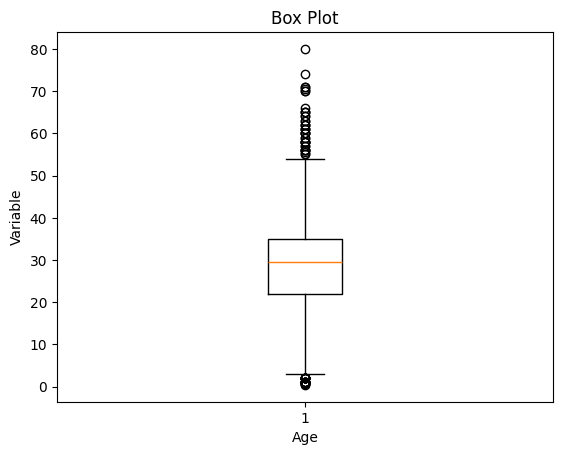

In [13]:
# Buat boxplot untuk kolom Age
import matplotlib.pyplot as plt

plt.boxplot(df3['Age'])
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

Dari diagram Box di atas, terlihat kumpulan data di kolom Age memiliki nilai outlier.  
Nilai kurang dari 5 dan lebih dari 55 adalah outlier.

- Hapus data outlier Age menggunakan metode IQR
- Simpan hasilnya di data framebaru

In [14]:
# Metode IQR (Interquartile Range): 
# Menentukan outlier sebagai nilai di luar rentang tertentu dari IQR.
Q1 = df3['Age'].quantile(0.25)
Q3 = df3['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
df4 = df3[(df3['Age'] >= lower_bound) & (df3['Age'] <= upper_bound)]

Lower Bound : 2.5
Upper Bound : 54.5


### Data Outlier
- hapus data outlier untuk kolom numerik lainnya
- Gunakan metode yang sesuai untuk masing-masing kolom
  - IQR
  - Z score
  - Winsorizing atau Capping

### Latihan mulai dari sini!

**Cek info data!**

In [15]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  824 non-null    int64  
 1   Survived     824 non-null    int64  
 2   Pclass       824 non-null    int64  
 3   Name         824 non-null    object 
 4   Sex          824 non-null    object 
 5   Age          824 non-null    float64
 6   SibSp        824 non-null    int64  
 7   Parch        824 non-null    int64  
 8   Ticket       824 non-null    object 
 9   Fare         824 non-null    float64
 10  Embarked     824 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 77.2+ KB


**Cek kolom "Survived" dan "Pclass"**

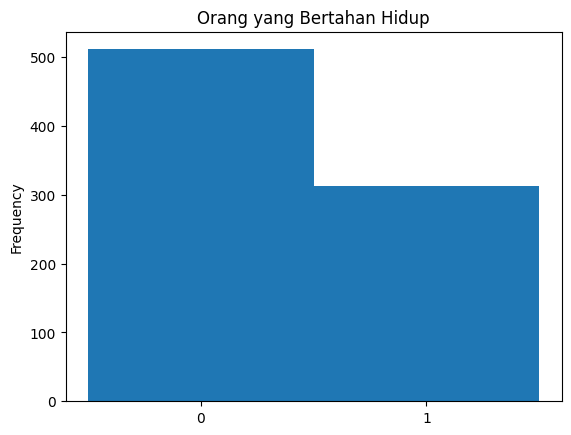

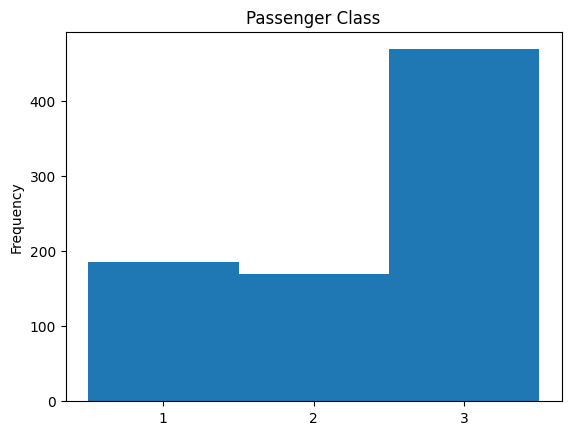

In [20]:
plt.hist(df4['Survived'], bins=[-0.5, 0.5, 1.5])
plt.ylabel('Frequency')
plt.title('Orang yang Bertahan Hidup')
plt.xticks([0, 1])
plt.show()

plt.hist(df4['Pclass'], bins=[0.5, 1.5, 2.5, 3.5])
plt.ylabel('Frequency')
plt.title('Passenger Class')
plt.xticks([1, 2, 3]) 
plt.show()

Dari data kolom "Survival" dan "Pclass", terlihat bahwa ini data yang tidak perlu dikoreksi, karena tidak ada konsep outlier dalam kolom ini

**Cek kolom "SibSp", "Parch" dan "Fare"**

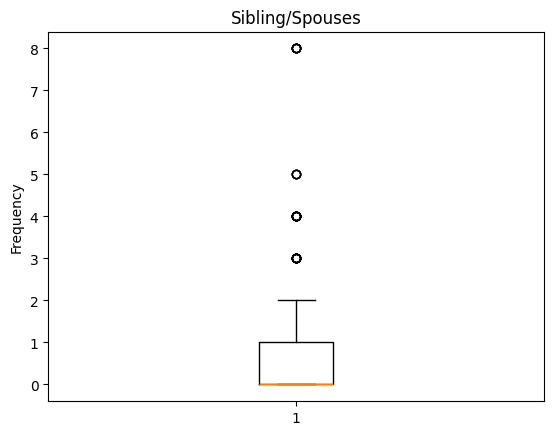

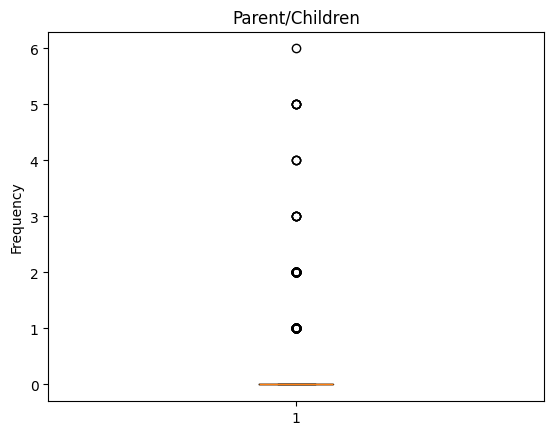

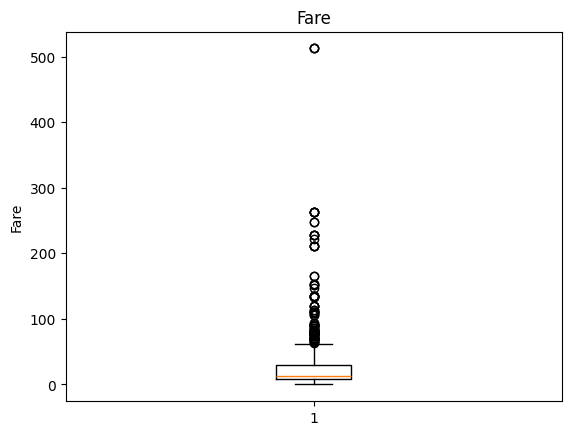

In [22]:
plt.boxplot(df4['SibSp'])
plt.ylabel('Frequency')
plt.title('Sibling/Spouses')
plt.show()

plt.boxplot(df4['Parch'])
plt.ylabel('Frequency')
plt.title('Parent/Children')
plt.show()

plt.boxplot(df4['Fare'])
plt.ylabel('Fare')
plt.title('Fare')
plt.show()

Terlihat bahwa, ketiga kolom memiliki karakteristik *skewed*

**Gunakan IQR untuk ketiganya**

IQR: "SibSp"

In [23]:
# Metode IQR (Interquartile Range): 
# Menentukan outlier sebagai nilai di luar rentang tertentu dari IQR.
Q1a = df4['SibSp'].quantile(0.25)
Q3a = df4['SibSp'].quantile(0.75)
IQRa = Q3a - Q1a
lower_bounda = Q1a - 1.5*IQRa
upper_bounda = Q3a + 1.5*IQRa
print('Lower Bound :',lower_bounda)
print('Upper Bound :',upper_bounda)

# Drop the outliers
df5 = df4[(df4['SibSp'] >= lower_bounda) & (df4['SibSp'] <= upper_bounda)]

Lower Bound : -1.5
Upper Bound : 2.5


IQR: "Parch"

In [24]:
# Metode IQR (Interquartile Range): 
# Menentukan outlier sebagai nilai di luar rentang tertentu dari IQR.
Q1b = df4['Parch'].quantile(0.25)
Q3b = df4['Parch'].quantile(0.75)
IQRb = Q3b - Q1b
lower_boundb = Q1b - 1.5*IQRb
upper_boundb = Q3b + 1.5*IQRb
print('Lower Bound :',lower_boundb)
print('Upper Bound :',upper_boundb)

# Drop the outliers
df5 = df4[(df4['Parch'] >= lower_boundb) & (df4['Parch'] <= upper_boundb)]

Lower Bound : 0.0
Upper Bound : 0.0


IQR: "Fare"

In [25]:
# Metode IQR (Interquartile Range): 
# Menentukan outlier sebagai nilai di luar rentang tertentu dari IQR.
Q1c = df4['Fare'].quantile(0.25)
Q3c = df4['Fare'].quantile(0.75)
IQRc = Q3c - Q1c
lower_boundc = Q1c - 1.5*IQRc
upper_boundc = Q3c + 1.5*IQRc
print('Lower Bound :',lower_boundc)
print('Upper Bound :',upper_boundc)

# Drop the outliers
df5 = df4[(df4['Fare'] >= lower_boundc) & (df4['Fare'] <= upper_boundc)]

Lower Bound : -25.287049999999994
Upper Bound : 63.20054999999999


**Cek Info utk "df5"**

In [26]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  718 non-null    int64  
 1   Survived     718 non-null    int64  
 2   Pclass       718 non-null    int64  
 3   Name         718 non-null    object 
 4   Sex          718 non-null    object 
 5   Age          718 non-null    float64
 6   SibSp        718 non-null    int64  
 7   Parch        718 non-null    int64  
 8   Ticket       718 non-null    object 
 9   Fare         718 non-null    float64
 10  Embarked     718 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 67.3+ KB
